In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=(~newMask)&(cpx_Glass['P_kbar_x']<17)
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)


C:\Users\penny\AppData\Local\Temp\ipykernel_30232\386116709.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## Proportion different filters discard

In [4]:
# This is using FeT in both Liq and Cpx
eq_tests_FeT=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, 
                                        Fe3Fet_Liq=0, T=Cpx_Glass['T_K_x'],
                                            P=Cpx_Glass['P_kbar_x'])


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


## CaTs - known problem, Mollo13 attribute to analytical uncertainty

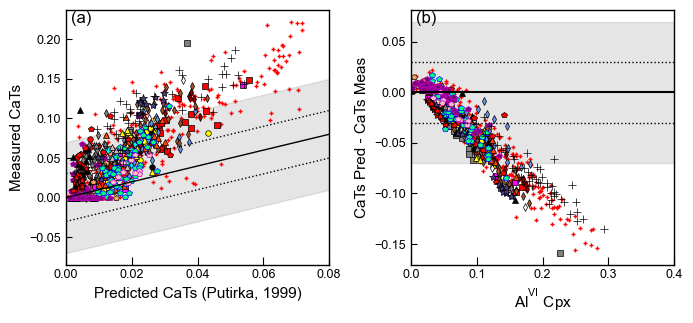

In [14]:

eq_tests_FeT_Filt2=eq_tests_FeT.loc[(Press_new)]
Cpx_Glass_Filt2=Cpx_Glass.loc[Press_new]
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (7, 3.3))


a=1






## OLD DATA, DONT NEED TO COLOR BY STUDY



ax1.plot(eq_tests_FeT['CaTs_Pred_Put1999'].loc[OldMask], 
         eq_tests_FeT['CaTs'].loc[OldMask], '+r', alpha=1, ms=3)

ax2.plot(
         eq_tests_FeT['Al_VI_cat_6ox'].loc[OldMask],
         eq_tests_FeT['Delta_CaTs_I_M_Put1999'].loc[OldMask],
        '+r', alpha=1, ms=3)

#### Looping through all the options
face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'green', 'green')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '+')
nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6, 6, 6)


Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:
     
    ax1.plot(eq_tests_FeT_Filt2['CaTs_Pred_Put1999'].loc[(Cpx_Glass_Filt2['Citation_x']==ref)], 
         eq_tests_FeT_Filt2['CaTs'].loc[(Cpx_Glass_Filt2['Citation_x']==ref)], 
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
  
    
    
    ax2.plot( 
         eq_tests_FeT_Filt2['Al_VI_cat_6ox'].loc[(Cpx_Glass_Filt2['Citation_x']==ref)], 
    eq_tests_FeT_Filt2['Delta_CaTs_I_M_Put1999'].loc[(Cpx_Glass_Filt2['Citation_x']==ref)], 
            marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
    
    ncolor+=1
    nmarkers+=1 
    
ax1.set_xlabel('Predicted CaTs (Putirka, 1999)')
ax1.set_ylabel('Measured CaTs')
minx=0
maxx=0.15
ax1.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)
ax1.set_xlim([0, 0.08])

ax1.fill_between([minx, maxx],[minx+0.07, maxx+0.07], [minx-0.07, maxx-0.07],
                 color='grey', alpha=0.2)
ax2.fill_between([0, 14],[-0.07, -0.07], [0.07, 0.07],
                 color='grey', alpha=0.2)
ax1.plot([minx, maxx],[minx+0.03, maxx+0.03],
                 ':k', lw=1)
ax1.plot([minx, maxx],[minx-0.03, maxx-0.03],
                 ':k', lw=1)


ax2.set_ylabel('CaTs Pred - CaTs Meas')
ax2.set_xlabel('Al$^{VI}$ Cpx')
# ax1.set_xlim([-0.001, 0.03])
# ax1.set_ylim([-0.003, 0.25])
ax2.plot([0, 12], [-0.03, -0.03], ':k', linewidth=1)
ax2.plot([0, 12], [0.03, 0.03], ':k', linewidth=1)
ax2.plot([0, 12], [0, 0], '-k')
ax1.annotate("(a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax2.annotate("(b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax2.set_xlim([0, 0.4])
fig.tight_layout()
fig.savefig('Cpx_Liq_CaTs.png', dpi=300)

## En Fs, DiHd - Mollo13

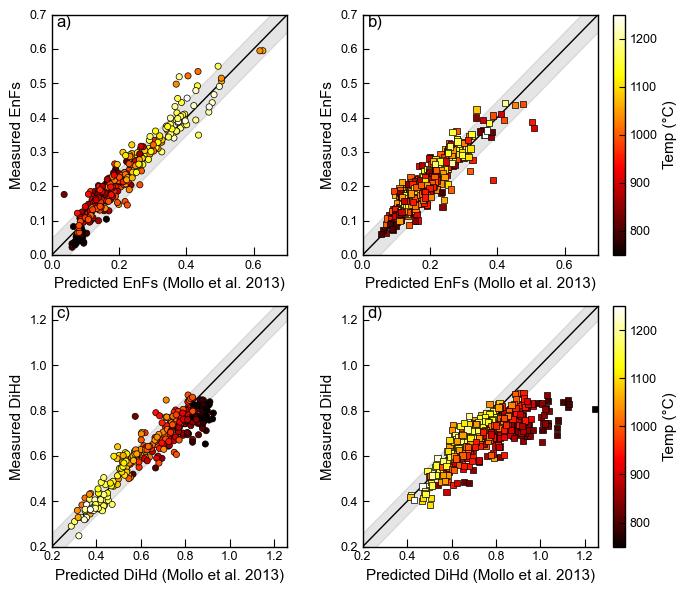

In [15]:
# Mollo13 give 1 sigma as 0.06
a=1
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize = (7,6))
ssize=20
# ax1.set_title('Arc-LEPR')
# ax2.set_title('Arc-PL')
# ax1.plot(eq_tests_FeT['EnFs_Pred_Mollo13'].loc[OldMask], 
#          eq_tests_FeT['EnFs'].loc[OldMask], '.k')
# ax2.plot(eq_tests_FeT['EnFs_Pred_Mollo13'].loc[Press_new], 
#          eq_tests_FeT['EnFs'].loc[Press_new], '.b')

s=ax1.scatter(eq_tests_FeT['EnFs_Pred_Mollo13'].loc[OldMask], 
          eq_tests_FeT['EnFs'].loc[OldMask], marker='o', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[OldMask]-273.15, cmap='hot',
 zorder=100)

s=ax2.scatter(eq_tests_FeT['EnFs_Pred_Mollo13'].loc[Press_new], 
          eq_tests_FeT['EnFs'].loc[Press_new], marker='s', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[Press_new]-273.15, cmap='hot',
 zorder=100)
fig.colorbar(s, ax=ax1, label='PEC-corrected MgO (wt%)')
fig.delaxes(fig.axes[4])
fig.colorbar(s, ax=ax2, label='Temp (°C)')


ax1.set_xlabel('Predicted EnFs (Mollo et al. 2013)')
ax1.set_ylabel('Measured EnFs')
ax2.set_xlabel('Predicted EnFs (Mollo et al. 2013)')
ax2.set_ylabel('Measured EnFs')
minx=0.0
maxx=0.7

ax1.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax1.fill_between([minx, maxx],[minx+0.05, maxx+0.05], [minx-0.05, maxx-0.05],
                 color='grey', alpha=0.2)

ax2.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax2.fill_between([minx, maxx],[minx+0.05, maxx+0.05], [minx-0.05, maxx-0.05],
                 color='grey', alpha=0.2)

minx=0.2
maxx=1.26
# ax3.plot(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[OldMask], 
#          eq_tests_FeT['DiHd_1996'].loc[OldMask], '.k')
# ax4.plot(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new], 
#          eq_tests_FeT['DiHd_1996'].loc[Press_new], '.b')


s=ax3.scatter(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[OldMask], 
          eq_tests_FeT['DiHd_1996'].loc[OldMask], marker='o', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[OldMask]-273.15, cmap='hot',
 zorder=100)

s=ax4.scatter(eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new], 
          eq_tests_FeT['DiHd_1996'].loc[Press_new], marker='s', s=ssize, edgecolors='k', linewidths=0.5,
            c=eq_tests_FeT['T_K_calc'].loc[Press_new]-273.15, cmap='hot',
 zorder=100)

fig.colorbar(s, ax=ax4, label='Temp (°C)')
fig.colorbar(s, ax=ax3, label='PEC-corrected MgO (wt%)')
fig.delaxes(fig.axes[6])

ax3.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax3.fill_between([minx, maxx],[minx+0.06, maxx+0.06], [minx-0.06, maxx-0.06],
                 color='grey', alpha=0.2)
ax4.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax4.fill_between([minx, maxx],[minx+0.06, maxx+0.06], [minx-0.06, maxx-0.06],
                 color='grey', alpha=0.2)

ax1.annotate("a)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax2.annotate("b)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax3.annotate("c)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)
ax4.annotate("d)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=12)


ax3.set_ylabel('Measured DiHd')
ax3.set_xlabel('Predicted DiHd (Mollo et al. 2013)')
ax4.set_ylabel('Measured DiHd')
ax4.set_xlabel('Predicted DiHd (Mollo et al. 2013)')
ax1.set_xlim([0,  0.7])
ax2.set_xlim([0,  0.7])
ax1.set_ylim([0,  0.7])
ax2.set_ylim([0,  0.7])

ax3.set_xlim([0.2,  1.26])
ax4.set_xlim([0.2,  1.26])
ax3.set_ylim([0.2,  1.26])
ax4.set_ylim([0.2,  1.26])
#ax1.set_ylim([-0.003, 0.25])
fig.tight_layout()
fig.savefig('Cpx_Liq_EnFs_Mollo13Di.png', dpi=300)

## Splitting into LEPR and not LEPR

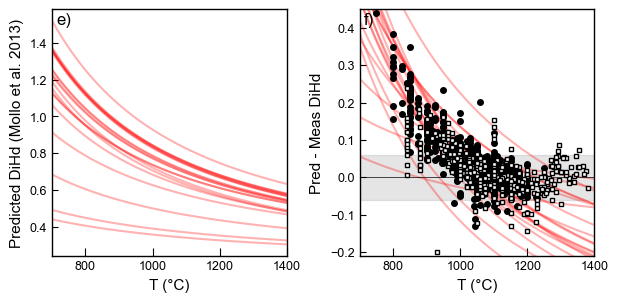

In [21]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(7,3.2))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.21, hspace=None)



  

   
# s=ax1.scatter(eq_tests_FeT['T_K_calc'].loc[Press_new]-273.15, 
#           eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new]-eq_tests_FeT['DiHd_1996'].loc[Press_new],
#               marker='o', s=ssize, edgecolors='k', linewidths=0.5,
#             c=eq_tests_FeT['H2O_Liq'].loc[Press_new]-273.15, cmap='hot',
#  zorder=100)

# fig.colorbar(s, ax=ax4, label='Temp (°C)')


T=np.linspace(700+273.15, 1400+273.15)

for i in [0, 5, 10, 20, 40, 35, 40, 45, 50, 55, 65,
          76, 81, 91, 100, 250, 260, 280, 299, 300]:

    DiHd_Pred_diff_1=(np.exp(-2.18 - 3.16 * eq_tests_FeT['Ti_Liq_cat_frac'].iloc[i]
    - 0.365 * np.log(eq_tests_FeT['Al_Liq_cat_frac'].iloc[i].astype(float))
     + 0.05 * np.log(eq_tests_FeT['Mg_Liq_cat_frac'].iloc[i]) - 3858.2 * (
    eq_tests_FeT['EnFs'].iloc[i]**2 / T) + (2107.4 / T)
    - 17.64 *cpx_Glass['P_kbar_x'].iloc[i] / T))-eq_tests_FeT['DiHd_1996'].iloc[i]


    DiHd_Pred_1=(np.exp(-2.18 - 3.16 * eq_tests_FeT['Ti_Liq_cat_frac'].iloc[i]
    - 0.365 * np.log(eq_tests_FeT['Al_Liq_cat_frac'].iloc[i].astype(float))
     + 0.05 * np.log(eq_tests_FeT['Mg_Liq_cat_frac'].iloc[i]) - 3858.2 * (
    eq_tests_FeT['EnFs'].iloc[i]**2 / T) + (2107.4 / T)
    - 17.64 *cpx_Glass['P_kbar_x'].iloc[i] / T))

    ax1.plot(T-273.15, DiHd_Pred_diff_1, '-r', alpha=0.3)

    ax2.plot(T-273.15, DiHd_Pred_1, '-r', alpha=0.3)

    



ax1.fill_between([700-273.15, 1700-273.15],[0.06, 0.06], [-0.06, -0.06],
                 color='grey', alpha=0.2)
ax1.plot([700, 1400], [0, 0], '-k', lw=0.5)



ax1.plot(eq_tests_FeT_Filt2['T_K_calc']-273.15, 
         eq_tests_FeT_Filt2['DiHd_Pred_Mollo13']-eq_tests_FeT_Filt2['DiHd_1996'],
'ok', ms=4)

ax1.plot(eq_tests_FeT['T_K_calc'].loc[OldMask]-273.15,
         eq_tests_FeT['DiHd_Pred_Mollo13'].loc[OldMask]
         -eq_tests_FeT['DiHd_1996'].loc[OldMask], 'sk', mfc='white', ms=2.5)


ax1.set_xlim([700, 1400])
ax2.set_xlim([700, 1400])
ax1.set_ylim([-0.21, 0.45])
ax2.set_ylabel('Predicted DiHd (Mollo et al. 2013)')
ax2.set_xlabel('T (°C)')
ax1.set_xlabel('T (°C)')
ax1.set_ylabel('Pred - Meas DiHd')

ax2.annotate("e)", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)
ax1.annotate("f)", xy=(0.02, 0.94), xycoords="axes fraction", fontsize=12)

plt.subplots_adjust( wspace=0.31)
fig.savefig('Cpx_Liq_DiHd_Temp.png', dpi=300)

In [17]:
len([0, 5, 10, 20, 40, 35, 40, 45, 50, 55, 65,
          76, 81, 91, 100, 250, 260, 280, 299, 300])

20

## Showing individual exps

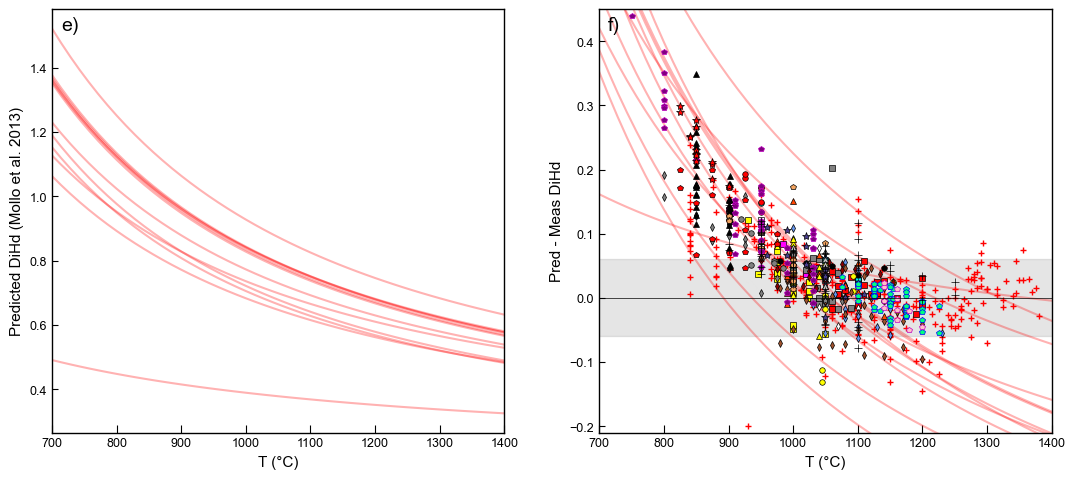

In [18]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12.9,5.5))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.21, hspace=None)


ax1.plot(eq_tests_FeT['T_K_calc'].loc[OldMask]-273.15,
         eq_tests_FeT['DiHd_Pred_Mollo13'].loc[OldMask]
         -eq_tests_FeT['DiHd_1996'].loc[OldMask], '+r', ms=5)

# s=ax1.scatter(eq_tests_FeT['T_K_calc'].loc[Press_new]-273.15, 
#           eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new]-eq_tests_FeT['DiHd_1996'].loc[Press_new],
#               marker='o', s=ssize, edgecolors='k', linewidths=0.5,
#             c=eq_tests_FeT['H2O_Liq'].loc[Press_new]-273.15, cmap='hot',
#  zorder=100)

# fig.colorbar(s, ax=ax4, label='Temp (°C)')


T=np.linspace(700+273.15, 1400+273.15)

for i in [0, 5, 10, 20, 40, 50, 100, 250, 260, 280, 299, 300]:

    DiHd_Pred_diff_1=(np.exp(-2.18 - 3.16 * eq_tests_FeT['Ti_Liq_cat_frac'].iloc[i]
    - 0.365 * np.log(eq_tests_FeT['Al_Liq_cat_frac'].iloc[i].astype(float))
     + 0.05 * np.log(eq_tests_FeT['Mg_Liq_cat_frac'].iloc[i]) - 3858.2 * (
    eq_tests_FeT['EnFs'].iloc[i]**2 / T) + (2107.4 / T)
    - 17.64 *cpx_Glass['P_kbar_x'].iloc[i] / T))-eq_tests_FeT['DiHd_1996'].iloc[i]


    DiHd_Pred_1=(np.exp(-2.18 - 3.16 * eq_tests_FeT['Ti_Liq_cat_frac'].iloc[i]
    - 0.365 * np.log(eq_tests_FeT['Al_Liq_cat_frac'].iloc[i].astype(float))
     + 0.05 * np.log(eq_tests_FeT['Mg_Liq_cat_frac'].iloc[i]) - 3858.2 * (
    eq_tests_FeT['EnFs'].iloc[i]**2 / T) + (2107.4 / T)
    - 17.64 *cpx_Glass['P_kbar_x'].iloc[i] / T))

    ax1.plot(T-273.15, DiHd_Pred_diff_1, '-r', alpha=0.3)

    ax2.plot(T-273.15, DiHd_Pred_1, '-r', alpha=0.3)

    
#### Looping through all the options

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'green', 'green')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '+')
nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6, 6, 6)




Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:
     
    ax1.plot(eq_tests_FeT_Filt2['T_K_calc'].loc[(Cpx_Glass_Filt2['Citation_x']==ref)]-273.15, 
         eq_tests_FeT_Filt2['DiHd_Pred_Mollo13'].loc[(Cpx_Glass_Filt2['Citation_x']==ref)]-
            eq_tests_FeT_Filt2['DiHd_1996'].loc[(Cpx_Glass_Filt2['Citation_x']==ref)], 
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
  
    
    
    ncolor+=1
    nmarkers+=1 
    

ax1.fill_between([700-273.15, 1700-273.15],[0.06, 0.06], [-0.06, -0.06],
                 color='grey', alpha=0.2)
ax1.plot([700, 1400], [0, 0], '-k', lw=0.5)

ax1.set_xlim([700, 1400])
ax2.set_xlim([700, 1400])
ax1.set_ylim([-0.21, 0.45])
ax2.set_ylabel('Predicted DiHd (Mollo et al. 2013)')
ax2.set_xlabel('T (°C)')
ax1.set_xlabel('T (°C)')
ax1.set_ylabel('Pred - Meas DiHd')

ax2.annotate("e)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)
ax1.annotate("f)", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=14)


fig.savefig('Cpx_Liq_DiHd_Temp.png', dpi=300)

## CaTi and Kd

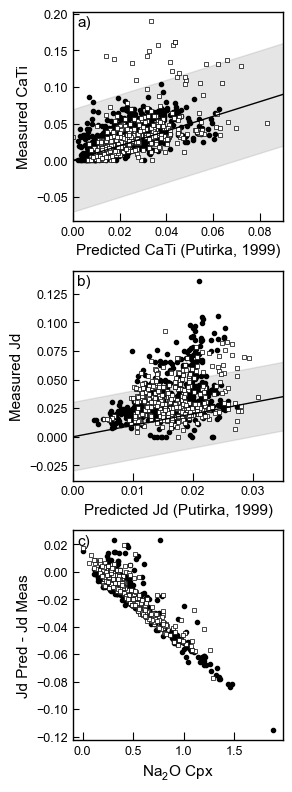

In [19]:
a=1
mew1=0.5
fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, figsize = (3,8))
ax1.plot(eq_tests_FeT['CaTi_Pred_Put1999'].loc[Press_new], 
         eq_tests_FeT['CaTi'].loc[Press_new], 'ok', ms=3)
ax1.plot(eq_tests_FeT['CaTi_Pred_Put1999'].loc[OldMask], 
         eq_tests_FeT['CaTi'].loc[OldMask], 'sk',  mfc='white',ms=2.5, mew=mew1)


ax1.set_xlabel('Predicted CaTi (Putirka, 1999)')
ax1.set_ylabel('Measured CaTi')
minx=0.0
maxx=0.1

ax1.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax1.fill_between([minx, maxx],[minx+0.07, maxx+0.07], [minx-0.07, maxx-0.07],
                 color='grey', alpha=0.2)


minx=0
maxx=0.1

ax2.plot(eq_tests_FeT['Jd_Pred_Put1999'].loc[Press_new], 
         eq_tests_FeT['Jd'].loc[Press_new],'ok', ms=3)
ax2.plot(eq_tests_FeT['Jd_Pred_Put1999'].loc[OldMask], 
         eq_tests_FeT['Jd'].loc[OldMask], 'sk',  mfc='white',ms=2.5, mew=mew1)



ax2.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)

ax2.fill_between([minx, maxx],[minx+0.03, maxx+0.03], [minx-0.03, maxx-0.03],
                 color='grey', alpha=0.2)
ax1.annotate("a)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=11)
ax2.annotate("b)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=11)
ax3.annotate("c)", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=11)



ax3.plot(eq_tests_FeT['Na2O_Cpx'].loc[Press_new],
         eq_tests_FeT['Jd_Pred_Put1999'].loc[Press_new]-eq_tests_FeT['Jd'].loc[Press_new],
         'ok', ms=3)
ax3.plot(eq_tests_FeT['Na2O_Cpx'].loc[OldMask],
         eq_tests_FeT['Jd_Pred_Put1999'].loc[OldMask]-eq_tests_FeT['Jd'].loc[OldMask],
         'sk',  mfc='white',ms=2.5, mew=mew1)
ax2.set_ylabel('Measured Jd')
ax2.set_xlabel('Predicted Jd (Putirka, 1999)')

ax3.set_ylabel('Jd Pred - Jd Meas')
ax3.set_xlabel('Na$_2$O Cpx')
ax1.set_xlim([0, 0.09])
ax2.set_xlim([0, 0.035])
fig.tight_layout()
fig.savefig('Cpx_LiqJdCaTi.png', dpi=300)

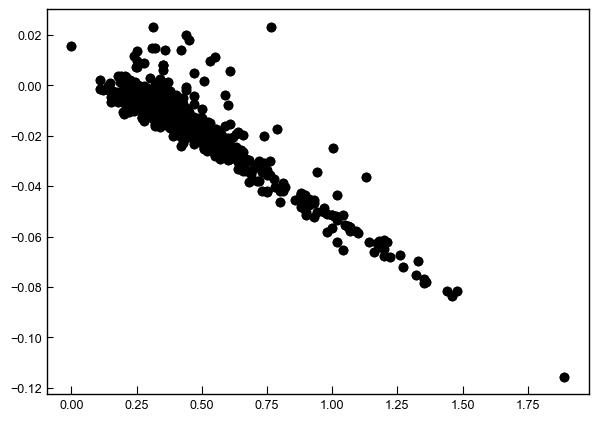

In [20]:
fig, (ax1) = plt.subplots(1, 1, figsize = (7,5))

ax1.plot(eq_tests_FeT['Na2O_Cpx'].loc[Press_new],
         eq_tests_FeT['Jd_Pred_Put1999'].loc[Press_new]-eq_tests_FeT['Jd'].loc[Press_new],
         'ok')
ax1.plot(eq_tests_FeT['Na2O_Cpx'].loc[Press_new],
         eq_tests_FeT['Jd_Pred_Put1999'].loc[Press_new]-eq_tests_FeT['Jd'].loc[Press_new],
         'ok')
                                    

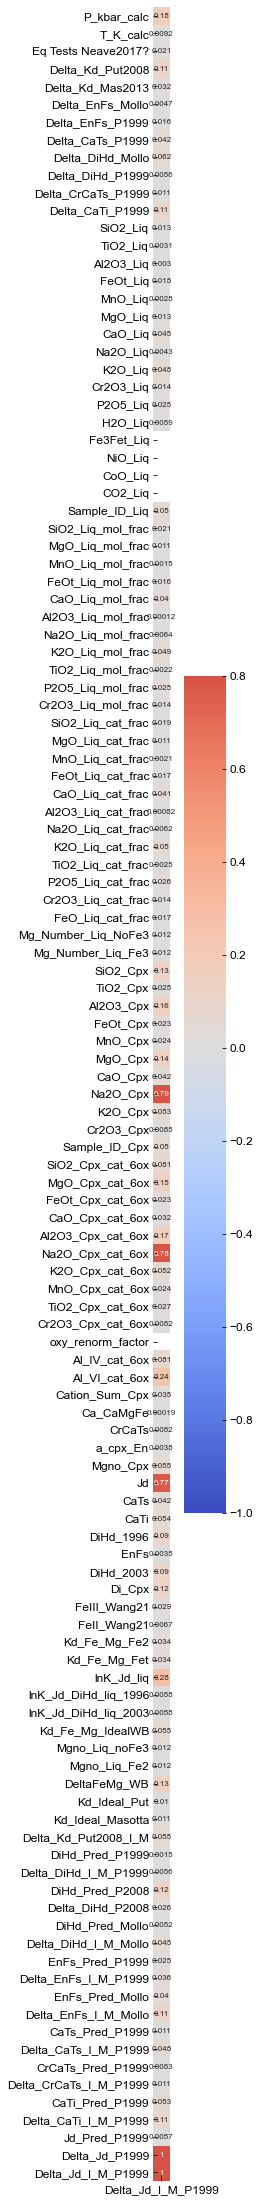

In [49]:
import seaborn as sns
corrmat = eq_tests_FeT.loc[Press_new].corr()
f, ax = plt.subplots(figsize=(5, 40))
x1=corrmat[['Delta_Jd_I_M_Put1999']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

In [ ]:
plt.plot(eq_tests_FeT['En_Fs'].loc[Press_new],
         eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new]-eq_tests_FeT['DiHd_1996'].loc[Press_new], '.b')


In [ ]:
import seaborn as sns
corrmat = eq_tests_FeT.loc[Press_new].corr()
f, ax = plt.subplots(figsize=(5, 40))
x1=corrmat[['Delta_DiHd_I_M']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

In [ ]:
plt.plot(eq_tests_FeT['T_K_calc'].loc[Press_new],
         eq_tests_FeT['Delta_Kd_Put2008_I_M'].loc[Press_new],
        'ok')

In [ ]:

import seaborn as sns
corrmat = eq_tests_FeT.loc[Press_new].corr()
f, ax = plt.subplots(figsize=(5, 40))
x1=corrmat[['Delta_Kd_Put2008_I_M']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=-1, center= 0, cmap= 'coolwarm', annot=True, annot_kws={"size":8});

In [ ]:
plt.plot(eq_tests_FeT['Ti_Liq_cat_frac'].loc[Press_new],
         eq_tests_FeT['DiHd_Pred_Mollo13'].loc[Press_new]-eq_tests_FeT['DiHd_1996'].loc[Press_new], '.b')


In [ ]:
## Which ones are actuallyoutside the error though
Fail_CaTs=eq_tests_FeT.loc[eq_tests_FeT['Delta_CaTs']>0.05].loc[Press_new]
Pass_CaTs=eq_tests_FeT.loc[eq_tests_FeT['Delta_CaTs']<0.05].loc[Press_new]

In [ ]:
## Which ones are actuallyoutside the error though
Fail_CaTs_Old=eq_tests_FeT.loc[eq_tests_FeT['Delta_CaTs']>0.05].loc[~Press_new]
Pass_CaTs_Old=eq_tests_FeT.loc[eq_tests_FeT['Delta_CaTs']<0.05].loc[~Press_new]

In [ ]:
plt.plot(eq_tests_FeT['Al_VI_cat_6ox'].loc[Press_new],
         eq_tests_FeT['Delta_CaTs_I_M_Put1999'].loc[Press_new],  '.k')

In [ ]:
plt.plot(Pass_CaTs_Old['Al_VI_cat_6ox'], Pass_CaTs_Old['Al2O3_Cpx'], 'ok')
plt.plot(Fail_CaTs_Old['Al_VI_cat_6ox'], Fail_CaTs_Old['Al2O3_Cpx'], '.r')

In [ ]:
plt.plot(Pass_CaTs['Al_VI_cat_6ox'], Pass_CaTs['Al2O3_Cpx'], 'ok')
plt.plot(Fail_CaTs['Al_VI_cat_6ox'], Fail_CaTs['Al2O3_Cpx'], '.r')

In [ ]:
plt.plot(eq_tests_FeT['Al2O3_Liq'].loc[Press_new],
         eq_tests_FeT['CaTs_Pred_Put1999'].loc[Press_new]-eq_tests_FeT['CaTs'].loc[Press_new], '.b')


In [ ]:
plt.plot(eq_tests_FeT['CaTs'].loc[Press_new],
         eq_tests_FeT['CaTs_Pred_Put1999'].loc[Press_new]-eq_tests_FeT['CaTs'].loc[Press_new], '.b')


In [ ]:
plt.plot(eq_tests_FeT['Al_VI_cat_6ox'].loc[Press_new],
         eq_tests_FeT['CaTs_Pred_Put1999'].loc[Press_new]-eq_tests_FeT['CaTs'].loc[Press_new], '.b')


From Mollo13 - We infer
that data from literature concerning the concentration of Al, Ti, Cr
and Na in clinopyroxene and melt may be affected by large analytical
errors, hampering an improvement of the model based on CaTs,
CaTiTs, CaCrTs and Jd components. 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(eq_tests_FeT['CaTs_Pred_Put1999'], 
         eq_tests_FeT['CaTs'], '.b')
ax2.plot(eq_tests_FeT['CaTs_Pred_Put1999'].loc[Press_new], 
         eq_tests_FeT['CaTs'].loc[Press_new], '.r')
ax1.plot([0, 0.25], [0, 0.25], '-r')

In [ ]:
plt.plot(eq_tests_FeT['Al_VI_cat_6ox'].loc[OldMask], 
         eq_tests_FeT['CaTs'].loc[OldMask], '.k')

In [ ]:
plt.plot(eq_tests_FeT['Na2O_Cpx_cat_6ox'].loc[OldMask], 
         eq_tests_FeT['CaTs'].loc[OldMask], '.k')

In [ ]:
plt.plot(Cpx_Glass['T_K_x'].loc[OldMask], 
         eq_tests_FeT['CaTs'].loc[OldMask], '.k')

In [ ]:
plt.plot(Cpx_Glass['P_kbar_x'].loc[OldMask], 
         eq_tests_FeT['CaTs'].loc[OldMask], '.k')

In [ ]:
plt.plot(eq_tests_FeT['CaO_Liq_cat_frac'].loc[OldMask], 
         eq_tests_FeT['CaTs'].loc[OldMask], '.k')

## Is sample noise a problem for CaTs as suggested by Mollo13?

In [ ]:
sam=[3, 50, 71, 120, 170, 200]
myLiquids1["P_kbar"]=cpx_Glass['P_kbar_x']
myLiquids1["T_K"]=cpx_Glass['T_K_x']

In [ ]:
myCpxs1.loc[sam]

### First, noise only on Al2O3 in Cpx

In [ ]:
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1.loc[sam], 
                        noise_percent=0, duplicates=1000, err_dist="normal")
Cpx_5Al2O3=pt.add_noise_sample_1phase(phase_comp=myCpxs1.loc[sam], variable="Al2O3", 
          variable_err=5, variable_err_type="Perc", duplicates=1000, 
          err_dist="normal")

noise_Al2O3only=pt.calculate_cpx_liq_eq_tests_FeT(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Al2O3, 
          P=Liquids_only_Noise['P_kbar'], T=Liquids_only_Noise['T_K'])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True)
ax1.hist(noise_Al2O3only.loc[noise_Al2O3only['Sample_ID_Cpx']==3, "Delta_CaTs_I_M_Put1999"])
ax2.hist(noise_Al2O3only.loc[noise_Al2O3only['Sample_ID_Cpx']==50, "Delta_CaTs_I_M_Put1999"])
ax3.hist(noise_Al2O3only.loc[noise_Al2O3only['Sample_ID_Cpx']==71, "Delta_CaTs_I_M_Put1999"])

In [ ]:
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1.loc[sam], 
                        noise_percent=0, duplicates=1000, err_dist="normal")
Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1.loc[sam], variable="Na2O", 
          variable_err=5, variable_err_type="Perc", duplicates=1000, 
          err_dist="normal")

noise_Na2Oonly=pt.calculate_cpx_liq_eq_tests_FeT(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Na2O, 
          P=Liquids_only_Noise['P_kbar'], T=Liquids_only_Noise['T_K'])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True)
ax1.hist(noise_Na2Oonly.loc[noise_Na2Oonly['Sample_ID_Cpx']==3, "Delta_CaTs_I_M_Put1999"])
ax2.hist(noise_Na2Oonly.loc[noise_Na2Oonly['Sample_ID_Cpx']==50, "Delta_CaTs_I_M_Put1999"])
ax3.hist(noise_Na2Oonly.loc[noise_Na2Oonly['Sample_ID_Cpx']==71, "Delta_CaTs_I_M_Put1999"])

## 5% noise on all Cpx components

In [ ]:
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1.loc[sam], 
                        noise_percent=0, duplicates=1000, err_dist="normal")
Cpx_5=pt.add_noise_sample_1phase(phase_comp=myCpxs1.loc[sam], 
          noise_percent=5, duplicates=1000, err_dist="normal")

noise_5only=pt.calculate_cpx_liq_eq_tests_FeT(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5, 
          P=Liquids_only_Noise['P_kbar'], T=Liquids_only_Noise['T_K'])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(10,12), sharex=True)
ax1.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_CaTs_I_M_Put1999"]);
ax2.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_CaTs_I_M_Put1999"]);
ax3.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_CaTs_I_M_Put1999"]);

ax4.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_DiHd_I_M"]);
ax5.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_DiHd_I_M"]);
ax6.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_DiHd_I_M"]);

ax7.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_EnFs_I_M"]);
ax8.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_EnFs_I_M"]);
ax9.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_EnFs_I_M"]);

ax10.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_Kd_Put2008_I_M"]);
ax11.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_Kd_Put2008_I_M"]);
ax12.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_Kd_Put2008_I_M"]);

## Noise on temperature alone

In [ ]:
Liquids_only_noNoiseT=pt.add_noise_sample_1phase(phase_comp=myLiquids1.loc[sam], variable="T_K", 
          variable_err=50, variable_err_type="Abs", duplicates=1000, 
          err_dist="normal")

Cpx_0=pt.add_noise_sample_1phase(phase_comp=myCpxs1.loc[sam], 
          noise_percent=0, duplicates=1000, err_dist="normal")

noise_5only=pt.calculate_cpx_liq_eq_tests_FeT(liq_comps=Liquids_only_noNoiseT, cpx_comps=Cpx_0, 
          P=Liquids_only_noNoiseT['P_kbar'], T=Liquids_only_noNoiseT['T_K'])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(10,12))
ax1.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_CaTs_I_M_Put1999"]);
ax2.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_CaTs_I_M_Put1999"]);
ax3.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_CaTs_I_M_Put1999"]);

ax4.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_DiHd_I_M"]);
ax5.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_DiHd_I_M"]);
ax6.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_DiHd_I_M"]);

ax7.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_EnFs_I_M"]);
ax8.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_EnFs_I_M"]);
ax9.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_EnFs_I_M"]);

ax10.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_Kd_Put2008_I_M"]);
ax11.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_Kd_Put2008_I_M"]);
ax12.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_Kd_Put2008_I_M"]);

## Noise on pressure

In [ ]:
Liquids_only_noNoiseT=pt.add_noise_sample_1phase(phase_comp=myLiquids1.loc[sam], variable="P_kbar", 
          variable_err=2, variable_err_type="Abs", duplicates=1000, 
          err_dist="normal")

Cpx_0=pt.add_noise_sample_1phase(phase_comp=myCpxs1.loc[sam], 
          noise_percent=0, duplicates=1000, err_dist="normal")

noise_5only=pt.calculate_cpx_liq_eq_tests_FeT(liq_comps=Liquids_only_noNoiseT, cpx_comps=Cpx_0, 
          P=Liquids_only_noNoiseT['P_kbar'], T=Liquids_only_noNoiseT['T_K'])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3, figsize=(10,12))
ax1.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_CaTs_I_M_Put1999"]);
ax2.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_CaTs_I_M_Put1999"]);
ax3.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_CaTs_I_M_Put1999"]);

ax4.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_DiHd_I_M"]);
ax5.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_DiHd_I_M"]);
ax6.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_DiHd_I_M"]);

ax7.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_EnFs_I_M"]);
ax8.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_EnFs_I_M"]);
ax9.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_EnFs_I_M"]);

ax10.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==3, "Delta_Kd_Put2008_I_M"]);
ax11.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==50, "Delta_Kd_Put2008_I_M"]);
ax12.hist(noise_5only.loc[noise_5only['Sample_ID_Cpx_Num']==71, "Delta_Kd_Put2008_I_M"]);

## Liquid noise only on CaO component

In [ ]:
Liquids_only_5Ca=pt.add_noise_sample_1phase(phase_comp=myLiquids1.loc[sam], 
                        variable="CaO", 
          variable_err=5, variable_err_type="Perc", duplicates=1000)
Cpx_0=pt.add_noise_sample_1phase(phase_comp=myCpxs1.loc[sam], 
          noise_percent=0, duplicates=1000, err_dist="normal")

noise_5cali=pt.calculate_cpx_liq_eq_tests_FeT(liq_comps=Liquids_only_5Ca, cpx_comps=Cpx_0, 
          P=Liquids_only_Noise['P_kbar'], T=Liquids_only_Noise['T_K'])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4), sharey=True)
ax1.hist(noise_5cali.loc[noise_5cali['Sample_ID_Cpx_Num']==3, "Delta_CaTs_I_M_Put1999"])
ax2.hist(noise_5cali.loc[noise_5cali['Sample_ID_Cpx_Num']==50, "Delta_CaTs_I_M_Put1999"])
ax3.hist(noise_5cali.loc[noise_5cali['Sample_ID_Cpx_Num']==71, "Delta_CaTs_I_M_Put1999"])

In [ ]:
sam=[3, 50, 71, 120, 170, 200]
myLiquids1["P_kbar"]=cpx_Glass['P_kbar_x']
myLiquids1["T_K"]=cpx_Glass['T_K_x']
Liquids_only_Noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1.loc[sam], variable="CaO",
                        variable_err=5, duplicates=1000, err_dist="normal")


In [ ]:
Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1.loc[sam], variable="Na2O", 
          variable_err=5, variable_err_type="Perc", duplicates=1000, 
          err_dist="normal")

Cpx_5Na2O.head()

In [ ]:
noise_Na2OCaO=pt.calculate_cpx_liq_eq_tests_FeT(liq_comps=Liquids_only_Noise, cpx_comps=Cpx_5Na2O, 
          P=Liquids_only_Noise['P_kbar'], T=Liquids_only_Noise['T_K'])


In [ ]:
noise_Na2OCaO['Sample_ID_Cpx']

In [ ]:

plt.hist(noise_Na2OCaO.loc[noise_Na2OCaO['Sample_ID_Cpx']==3, "Delta_CaTs_I_M_Put1999"])

In [ ]:
fig, ((ax1, ax2),  (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))
ax1.plot(eq_tests_FeT['CaTs_Pred_Put1999'].loc[Press_new], 
         eq_tests_FeT['CaTs'].loc[Press_new], '.b')
ax1.set_xlabel('CaTs Pred (Put1999)')
ax1.set_ylabel('CaTs Meas')
minx=0
maxx=0.2
ax1.plot([minx, maxx], [minx, maxx], '-k', linewidth=a)
ax1.plot([minx, maxx], [minx+0.06, maxx+0.06], ':k', linewidth=a)
ax1.plot([minx, maxx], [minx-0.06, maxx-0.06], ':k', linewidth=a)
ax1.set_xlim([0, 0.06])
ax1.set_ylim([0, 0.2])

## Values with Signs

In [ ]:
b=1.5
Kd_SortedNew=np.sort(eq_tests_FeT['Delta_Kd_Put2008_I_M'].loc[Press_new])
Kd_SortedNewFe2=np.sort(comps_Fe3_Kress['Delta_Kd_Put2008_I_M'].loc[Press_new])

fig, ((ax1, ax2),  (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,10))
ax1.step(np.concatenate([Kd_SortedNew, Kd_SortedNew[[-1]]]),
         np.arange(Kd_SortedNew.size+1)/Kd_SortedNew.size, color='blue', linewidth=b, label='Fet (New)')
ax1.step(np.concatenate([Kd_SortedNewFe2, Kd_SortedNewFe2[[-1]]]),
         np.arange(Kd_SortedNewFe2.size+1)/Kd_SortedNewFe2.size, color='red', linewidth=b, label='Fe2 (New)')



ax1.plot([0.03, 0.03], [0, 1], '-.k', label='Neave2019 1σ')
ax1.plot([0.08, 0.08], [0, 1], ':k', label='Putirka (2008) 1σ')
ax1.plot([-0.03, -0.03], [0, 1], '-.k', label='Neave2019 1σ')
ax1.plot([-0.08, -0.08], [0, 1], ':k', label='Putirka (2008) 1σ')

ax1.set_xlim([-0.4, 0.2])
ax1.set_ylim([0, 1])

EnFs_SortedNew=np.sort(eq_tests_FeT['Delta_EnFs_I_M'].loc[Press_new])
ax2.step(np.concatenate([EnFs_SortedNew, EnFs_SortedNew[[-1]]]),
         np.arange(EnFs_SortedNew.size+1)/EnFs_SortedNew.size, color='blue', linewidth=b)
ax2.plot([0.05, 0.05], [0, 1],  '-.k', label='Neave2019 filter')
ax2.plot([-0.05, -0.05], [0, 1],  '-.k', label='Neave2019 filter')

ax2.set_xlim([-0.1, 0.2])
ax2.set_ylim([0, 1])

CaTs_SortedNew=np.sort(eq_tests_FeT['Delta_CaTs_I_M_Put1999'].loc[Press_new])
ax3.step(np.concatenate([CaTs_SortedNew, CaTs_SortedNew[[-1]]]),
         np.arange(CaTs_SortedNew.size+1)/CaTs_SortedNew.size, color='blue', linewidth=b)
ax3.plot([0.06, 0.06], [0, 1], '-.k', label='Neave2019 filter')
ax3.plot([-0.06, -0.06], [0, 1], '-.k', label='Neave2019 filter')

ax3.set_xlim([-0.2, 0.1])
ax3.set_ylim([0, 1])

DiHd_SortedNew=np.sort(eq_tests_FeT['Delta_DiHd_I_M'].loc[Press_new])
ax4.step(np.concatenate([DiHd_SortedNew, DiHd_SortedNew[[-1]]]),
         np.arange(DiHd_SortedNew.size+1)/DiHd_SortedNew.size, color='blue', linewidth=b)
ax4.plot([0.06, 0.06], [0, 1],  '-.k', label='Neave2019 filter')
ax4.plot([-0.06, -0.06], [0, 1],  '-.k', label='Neave2019 filter')

# ax4.set_xlim([-0.2, 0.2])
ax4.set_ylim([0, 1])

ax1.set_ylabel('Cumulative frequency')
ax3.set_ylabel('Cumulative frequency')

import matplotlib.patches as patches
rect_ax1=patches.Rectangle((-0.4,0.16),0.8, 0.68,linewidth=1,edgecolor='none',facecolor='yellow',
                           alpha=0.3)
rect_ax2=patches.Rectangle((-0.3,0.16),0.6, 0.68,linewidth=1,edgecolor='none',facecolor='yellow',
                           alpha=0.3)
rect_ax3=patches.Rectangle((-0.3,0.16),0.6, 0.68,linewidth=1,edgecolor='none',facecolor='yellow',
                           alpha=0.3)
rect_ax4=patches.Rectangle((-0.3,0.16),0.6, 0.68,linewidth=1,edgecolor='none',facecolor='yellow',
                           alpha=0.3)

ax1.add_patch(rect_ax1)
ax2.add_patch(rect_ax2)
ax3.add_patch(rect_ax3)
ax4.add_patch(rect_ax4)


#ax1.legend()

ax1.set_xlabel('Kd Pred - Kd Meas (Putirka, 2008)')
ax2.set_xlabel('EnFs Pred - EnFs Meas')
ax3.set_xlabel('CaTs Pred - CaTs Meas')
ax4.set_xlabel('DiHd Pred - DiHd Meas')
fig.savefig('EquilibriumTests-cpx-liq-new-data-sign.png', dpi=300)

## KD discrepency vs Fo2

In [ ]:
plt.plot(Cpx_Glass['logfo2'].loc[Cpx_Glass['logfo2']!=0], 
         comps_Fe3_Kress['Fe3Fet_Liq'].loc[Cpx_Glass['logfo2']!=0], '.k')

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize = (12,5))

ax1.plot(myLiquids_Fe3_Kress['Fe3Fet_Liq'].loc[(Cpx_Glass['logfo2']<0)&Press_new&Eq_Mask], 
         comps_Fe3_Kress['Kd_Fe_Mg_Fet'].loc[(Cpx_Glass['logfo2']<0)&Press_new&Eq_Mask], 'ok')
ax1.set_xlabel('Fe$')
ax2.plot(myLiquids_Fe3_Kress['Fe3Fet_Liq'].loc[(Cpx_Glass['logfo2']<0)&Press_new&Eq_Mask], 
         comps_Fe3_Kress['Kd_Fe_Mg_Fe2'].loc[(Cpx_Glass['logfo2']<0)&Press_new&Eq_Mask], 'ok')

ax1.set_xlabel('Fe$^{3+}$/Fe$_T$ (KC91)')
ax1.set_ylabel('Ideal Kd - Measured Kd (Fe$_{t}$)')
ax2.set_xlabel('Fe$^{3+}$/Fe$_T$ (KC91)')
ax2.set_ylabel('Ideal Kd - Measured Kd (Fe$^{2+}$)')

fig.savefig(r'../Calibration_Datasets/Fe3FeTvsKd-cpx-liq.png', dpi=300)

In [ ]:
xt=np.linspace(1100, 1600, 100)
CalcKd=np.exp(-0.107-1719/xt)

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(Cpx_Glass['T_K_x'], 
         eq_tests_FeT['Kd_Fe_Mg_Fet'], '.b', label='New + LEPR')
calc_reg_old=pt.calculate_R2(Cpx_Glass['T_K_x'], 
         eq_tests_FeT['Kd_Fe_Mg_Fet'])
calc_reg_new=pt.calculate_R2(Cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask], 
         eq_tests_FeT['Kd_Fe_Mg_Fet'].loc[Press_new&Eq_Mask])

ax1.plot(xt, CalcKd, '-r')
ax1.plot(xt, CalcKd+0.08, ':r')
ax1.plot(xt, CalcKd-0.08, ':r')


ax1.plot(xt, calc_reg_old['Grad']*xt+calc_reg_old['Int'], '-b')
ax1.plot(xt, calc_reg_new['Grad']*xt+calc_reg_new['Int'], '-c')

ax2.plot(Cpx_Glass['T_K_x'].loc[(Press_new&(Eq_Mask))], 
         eq_tests_FeT['Kd_Fe_Mg_Fet'].loc[(Press_new&(Eq_Mask))], '.c', label='New')
calc_reg=pt.calculate_R2(Cpx_Glass['T_K_x'].loc[(Press_new&(Eq_Mask))], 
         eq_tests_FeT['Kd_Fe_Mg_Fet'].loc[(Press_new&(Eq_Mask))])

ax2.plot(xt, CalcKd, '-r', label='Put log regression')
ax2.plot(xt, CalcKd+0.08, ':r', label='Put +- 1σ')
ax2.plot(xt, CalcKd-0.08, ':r')

ax2.plot(xt, calc_reg_old['Grad']*xt+calc_reg_old['Int'], '-b', label='Reg (New+LEPR)')
ax2.plot(xt, calc_reg_new['Grad']*xt+calc_reg_new['Int'], '-c', label='Reg (New)')
ax2.legend()
ax1.legend()
ax1.set_xlabel('Temperature (K)')
ax2.set_ylabel('Measured Kd (Fet)')


fig.savefig(r'../Calibration_Datasets/KdTemp-cpx-liq.png', dpi=300)